In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("../../data/cleaned/movie_meta_cleaned_ver6_transformed.csv", engine= "python", encoding='cp949')

In [3]:
df

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
0,tt4154796,Avengers: Endgame,2019,43581,181,PG-13,8.5,19581271,69437591,89018862,...,0.022812077,.,.,.,BUENA VISTA,6,10,920,0,0.770171
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,40683,136,PG-13,6.6,35478573,58936309,94414882,...,0.147174988,.,.,.,BUENA VISTA,6,1,650,1,0.977014
2,tt2395427,Avengers: Age of Ultron,2015,42125,141,PG-13,7.3,33569045,55802159,89371204,...,0.073134239,1042.255387,755.7743093,286.4810779,BUENA VISTA,6,1,650,2,0.861669
3,tt4154756,Avengers: Infinity War,2018,43217,156,PG-13,8.5,23700665,77736363,101437028,...,0.034914738,161,1000,-839,BUENA VISTA,6,10,920,3,0.155046
4,tt0449088,Pirates of the Caribbean: At World's End,2007,39227,167,PG-13,7.1,314040375,7640482,321680857,...,1.014930979,1019.243399,767.8666982,251.3767009,BUENA VISTA,6,1,650,4,0.876586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,tt5997666,Jab Harry Met Sejal,2017,42951,144,NOT RATED,5.3,.,.,.,...,.,.,.,.,.,.,1,.,5530,0.993581
5149,tt5970844,Thugs of Hindostan,2018,43412,164,NOT RATED,4,.,.,.,...,.,.,.,.,Yash,4,1,610,5531,0.990743
5150,tt5956100,Tiger Zinda Hai,2017,43091,145,NOT RATED,6,.,.,.,...,.,.,.,.,Yash,4,1,610,5532,0.270539
5151,tt5882970,Tubelight,2017,42909,170,NOT RATED,4,.,.,.,...,.,.,.,.,Yash,4,1,610,5533,0.916752


## string to num

In [4]:
col_numeric = ['release_year','release_date', 'runtime', 'imdb_score', 'dvd_sales', 'blu_sales', 'total_sales',
               'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total',
               'metascore', 'big_awards_num', 'awards_win_num', 'awards_nomin_num',
               'reviews_users', 'reviews_critics', 'budget', 'series_new', 'income_opening',
               'votes', 'income_usa', 'income_int', 'income_ww', 'contract_price', 'studio_score', 'price_class','contract_year',
               'dvd_over_income', 'movie_down_sales', 'contract_price_inf', 'net_profit', 'studio_score', 'contract_price', 'inf']
for col in col_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### '.' to Nan

In [5]:
for col in df.columns:
        df.loc[df[col] == '.', col] = np.nan

C:\Users\cresc\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# 이상치 확인 및 처리

In [6]:
len(df)

5153

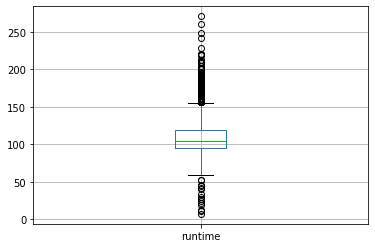

In [7]:
df[['runtime']].boxplot()

In [8]:
df['runtime'].isna().sum()

0

In [9]:
df[df['runtime'] < 50]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
752,tt0365474,The Making of 'The X Files: Fight the Future',1998.0,36081.0,27.0,NaN,7.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,760.0,0.996281
992,tt0349773,The Making of 'Alien 3',1992.0,NaN,22.0,PG-13,6.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1001.0,0.986093
1087,tt0775408,'V for Vendetta' Unmasked,2006.0,38792.0,30.0,NaN,7.8,58827369.0,3378266.0,62205635.0,...,0.83430,NaN,NaN,NaN,NaN,NaN,10.0,NaN,1097.0,0.335863
3010,tt0427498,Mar adentro,2004.0,38261.0,19.0,NaN,7.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3061.0,0.991979
3405,tt0953896,The Making of 'Severance',2007.0,39090.0,34.0,NaN,7.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3470.0,0.890904
3631,tt0245280,Michael Jordan to the Max,2000.0,36651.0,46.0,NOT RATED,7.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20th Century Fox,6.0,1.0,650.0,3714.0,0.978791
3878,tt1529567,Sea Rex 3D: Journey to a Prehistoric World,2010.0,40576.0,41.0,NOT RATED,6.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3D,2.0,1.0,570.0,3981.0,0.995187
3914,tt1200853,Stuck,2008.0,39463.0,11.0,NaN,6.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4017.0,0.363051
4156,tt1145855,Holly Hobbie and Friends: Best Friends Forever,2007.0,39343.0,44.0,NOT RATED,5.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4305.0,0.618700
4209,tt1084715,The Making of 'This Is England',2007.0,39330.0,7.0,TV-PG,7.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,IFC,4.0,1.0,610.0,4383.0,0.227994


## 짧은 영화를 outlier라고 하기엔 단편영화가 존재. 단 making film은 제거할 필요

In [10]:
# title에 making 포함되는 film제거
making = 0
for i in df.index:
    if 'making' in df['title'][i].lower():
        df.drop(i, inplace=True)
        print(i)
        making += 1
print('title에 "making"포함되는 영화 수',making)

752
950
986
992
3366
3383
3405
3583
3622
3793
4209
4336
4591
title에 "making"포함되는 영화 수 13


In [11]:
len(df)

5140

In [12]:
5153 - 13

5140

In [13]:
# title에 unmasked 들어가는 title 제거
unmasked = 0
for i in df.index:
    if 'unmasked' in df['title'][i].lower():
        df.drop(i, inplace=True)
        unmasked += 1
print('title에 "unmasked"포함되는 영화 수',unmasked)

title에 "unmasked"포함되는 영화 수 1


In [14]:
len(df)

5139

In [15]:
5140 - 1

5139

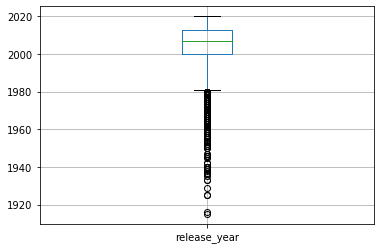

In [16]:
df[['release_year']].boxplot()

## 옛날 영화를 이상치라고 할 순 없음. 단 분석 시점은 2019년이므로 2019, 2020년 영화 제거

In [17]:
df[df['inv_exist']==1]['release_year'].unique()

array([2015., 2018., 2007., 2017., 2016., 2009., 2013., 2014., 2012.,
       2006., 2010., 2011., 2008., 2005.])

In [18]:
df[(df['release_year'] == 2019) | (df['release_year'] == 2020)]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
0,tt4154796,Avengers: Endgame,2019.0,43581.0,181.0,PG-13,8.5,19581271.0,69437591.0,89018862.0,...,0.022812,NaN,NaN,NaN,BUENA VISTA,6.0,10.0,920.0,0.0,0.770171
10,tt6105098,The Lion King,2019.0,43665.0,118.0,PG,6.9,16106589.0,31098360.0,47204949.0,...,0.029627,NaN,NaN,NaN,BUENA VISTA,6.0,1.0,650.0,10.0,0.966777
44,tt1979376,Toy Story 4,2019.0,43637.0,89.0,G,7.9,15922295.0,33742242.0,49664537.0,...,0.036684,NaN,NaN,NaN,BUENA VISTA,6.0,10.0,920.0,46.0,0.934924
57,tt6806448,Fast & Furious Presents: Hobbs & Shaw,2019.0,43679.0,134.0,PG-13,6.5,13100134.0,17129294.0,30229428.0,...,0.075307,NaN,NaN,NaN,Universal,6.0,1.0,650.0,59.0,0.259477
63,tt6565702,X-Men: Dark Phoenix,2019.0,43623.0,114.0,PG-13,5.8,6710063.0,14236962.0,20947025.0,...,0.101905,NaN,NaN,NaN,20th Century Fox,6.0,1.0,650.0,65.0,0.913004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,tt8079248,Yesterday,2019.0,43644.0,112.0,PG-13,6.9,2539290.0,3730419.0,6269709.0,...,0.034649,NaN,NaN,NaN,Universal,6.0,1.0,650.0,5468.0,0.403423
5098,tt2395469,Gully Boy,2019.0,43510.0,153.0,NOT RATED,8.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5478.0,0.989474
5099,tt7721800,Bharat,2019.0,43621.0,150.0,NOT RATED,5.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5479.0,0.910812
5117,tt2452244,Isn't It Romantic,2019.0,43509.0,88.0,PG-13,5.9,1340119.0,1268340.0,2608459.0,...,0.027466,NaN,NaN,NaN,WB,6.0,1.0,650.0,5497.0,0.434605


In [19]:
# 2019년, 2020년 영화 제거
df = df[(df['release_year'] != 2019) & (df['release_year'] != 2020)]

In [20]:
len(df)

4990

In [21]:
5139 - 149

4990

# release date 없는 행 제거

In [22]:
df['release_date'].isna().sum()

14

In [23]:
df = df[df['release_date'].isna() == False]
len(df)

4976

In [24]:
4990 - 14

4976

In [25]:
df[df['mpa_rating'].isna()]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
420,tt5026378,Kingsman: The Secret Service Revealed,2015.0,42163.0,129.0,NaN,7.8,17997226.0,20460518.0,38457744.0,...,0.140316,NaN,NaN,NaN,20th Century Fox,6.0,10.0,920.0,425.0,0.872064
470,tt7232438,The Promise,2017.0,42985.0,134.0,NaN,6.0,722724.0,233067.0,955791.0,...,0.087877,NaN,NaN,NaN,GDH,4.0,1.0,610.0,475.0,0.794220
514,tt1804538,Father's Day,1997.0,35559.0,98.0,NaN,8.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,520.0,0.356705
570,tt5649074,D챕j횪 Vu,2006.0,38795.0,126.0,NaN,NaN,40598932.0,NaN,40598932.0,...,0.633976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576.0,0.995464
1017,tt4047068,Bullet to the Head: Mayhem Inc.,2013.0,41471.0,91.0,NaN,6.8,7753120.0,2758681.0,10511801.0,...,0.816993,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1026.0,0.760129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,tt1144804,Incredible Love,2009.0,39997.0,135.0,NaN,3.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5101.0,0.980165
4759,tt3142688,Finding Fanny,2014.0,41894.0,102.0,NaN,5.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,FIP,2.0,1.0,570.0,5129.0,0.964214
4981,tt4814290,Te3n,2016.0,42531.0,133.0,NaN,7.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Relbig.,2.0,1.0,570.0,5357.0,0.969277
5067,tt3554418,Khoobsurat,2014.0,41901.0,130.0,NaN,6.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,UTV,2.0,1.0,570.0,5445.0,0.992716


## mpa등급이 없는 영화는 미국에서 개봉하지 않았거나 making film으로 판단하여 제거

In [26]:
df = df[df['mpa_rating'].isna() == False]

In [27]:
len(df)

4874

In [28]:
4976 - 102

4874

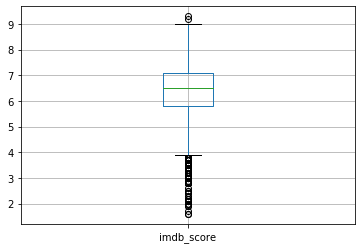

In [29]:
df[['imdb_score']].boxplot()

In [30]:
df[df['imdb_score'].isna()]

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
2695,tt4064028,Hoodwinked,2006.0,38777.0,80.0,NOT RATED,NaN,31481373.0,NaN,31481373.0,...,0.612638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2732.0,0.988239
4044,tt8332674,Truth or Dare,2018.0,43197.0,100.0,TV-MA,NaN,1164859.0,NaN,1164859.0,...,0.028129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4178.0,0.991264


## IMDB score 없는 영화 제거

In [31]:
df = df[df['imdb_score'].isna() == False]

In [32]:
len(df)

4872

In [33]:
4874 - 2 

4872

In [34]:
df['inf_income_usa'].isna().sum()

332

In [35]:
df['income_usa'].isna().sum()

169

In [36]:
df = df.reset_index()

In [37]:
# inf_income_usa 결측치 중 income_usa는 존재하는 df
df[(df['inf_income_usa'].isna() == True) & (df['income_usa'].isna() == False)]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
1214,1285,tt0249516,Foodfight!,2012.0,41317.0,91.0,PG,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,Lions,4.0,1.0,610.0,1295.0,0.033616
1237,1309,tt0056937,Cleopatra,1963.0,23223.0,248.0,G,7.0,200620.0,2541867.0,...,0.003520,NaN,NaN,NaN,20th Century Fox,6.0,1.0,650.0,1319.0,0.923861
1586,1667,tt1540128,Playing for Keeps,2012.0,41250.0,105.0,PG-13,5.7,2502909.0,835135.0,...,0.191014,NaN,NaN,NaN,FD,2.0,1.0,570.0,1681.0,0.945781
1838,1928,tt1935194,Overdrive,2017.0,43014.0,93.0,PG-13,5.4,NaN,NaN,...,NaN,NaN,NaN,NaN,Paramount,6.0,1.0,650.0,1949.0,0.913384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,4560,tt0006333,"20,000 Leagues Under the Sea",1916.0,6203.0,105.0,PASSED,6.2,NaN,NaN,...,NaN,NaN,NaN,NaN,Universal,6.0,1.0,650.0,4886.0,0.760472
4326,4581,tt0034587,Cat People,1942.0,15700.0,73.0,NOT RATED,7.3,NaN,730008.0,...,NaN,NaN,NaN,NaN,RKO,1.0,1.0,550.0,4915.0,0.988068
4328,4583,tt0063350,Night of the Living Dead,1968.0,25115.0,96.0,NOT RATED,7.9,NaN,NaN,...,NaN,NaN,NaN,NaN,WalterR,1.0,1.0,550.0,4920.0,0.316967
4329,4584,tt0004972,The Birth of a Nation,1915.0,5559.0,190.0,TV-PG,6.4,NaN,NaN,...,NaN,NaN,NaN,NaN,Epoch,1.0,1.0,550.0,4921.0,0.984687


In [38]:
df[df['movie_id'] == 'tt5851562'][['income_usa','inf_income_usa']]

,income_usa,inf_income_usa
567,1521672.0,NaN


## 가장 가까운 날짜의 inflation으로 income_usa만 있는 row의 inf_income_usa를 구함

In [39]:
df['inf'].isna().sum()

334

In [40]:
df[df['inf_income_usa'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
439,472,tt5519340,Bright,2017.0,43091.0,117.0,TV-MA,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.0,0.102129
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
758,805,tt4743226,Air Strike,2018.0,43399.0,97.0,R,3.2,NaN,NaN,...,NaN,NaN,NaN,NaN,LIONSGATE,4.0,NaN,NaN,813.0,0.918572
1214,1285,tt0249516,Foodfight!,2012.0,41317.0,91.0,PG,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,Lions,4.0,1.0,610.0,1295.0,0.033616
1237,1309,tt0056937,Cleopatra,1963.0,23223.0,248.0,G,7.0,200620.0,2541867.0,...,0.003520,NaN,NaN,NaN,20th Century Fox,6.0,1.0,650.0,1319.0,0.923861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,5136,tt1786751,CBGB,2013.0,41558.0,81.0,R,6.6,730891.0,105704.0,...,NaN,NaN,NaN,NaN,XL,2.0,NaN,NaN,5518.0,0.971522
4858,5138,tt5108476,Befikre,2016.0,42713.0,132.0,NOT RATED,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5520.0,0.995110
4865,5146,tt6588966,Hichki,2018.0,43182.0,106.0,NOT RATED,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5528.0,0.993959
4866,5147,tt6527426,Zero,2018.0,43455.0,164.0,NOT RATED,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5529.0,0.992802


In [41]:
df[(df['inf'].isna()) & (df['inf_income_usa'].isna() == False)]['income_usa']

# income이 0과 nan인 income_usa의 존재 때문에 inf와 inf_income_usa가 2개 차이남

1335    0.0
4348    NaN
Name: income_usa, dtype: float64

In [42]:
# def inflation():
#     global df
#     df['inf'] = np.nan
#     for i in df.index:
#             if (math.isnan(df.loc[i, 'inf_income_usa']) == False) & (math.isnan(df.loc[i, 'income_usa']) == False) & (
#                     df.loc[i, 'income_usa'] != 0):
#                     df.loc[i, 'inf'] = float(df.loc[i, 'inf_income_usa']) / float(df.loc[i, 'income_usa'])
#             else:
#                     pass
# inflation()

In [43]:
df['inf'].isna().sum()

334

In [44]:
# df = df.reset_index()
a = 0
for i in df.index:
    temp = {}
    if (math.isnan(df['inf_income_usa'][i]) == True) & (math.isnan(df['income_usa'][i]) == False):
        for j in df[df['inf'].isna() == False].index:
            if i != j:
                temp.update({abs(df['release_date'][i] - df['release_date'][j]) : j})
                
        df['inf_income_usa'][i] = df['income_usa'][i] * df['inf'][temp.get(min(temp.keys()))]
        print(df['inf_income_usa'][i], i, df['income_usa'][i], df['inf'][temp.get(min(temp.keys()))], temp.get(min(temp.keys())))
        a += 1
print(a)

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1545421.5216084241 567 1521672.0 1.015607517 2044
52032.32765016 1214 46435.0 1.120541136 1867
75470038.263 1237 57000000.0 1.324035759 4287
14996066.567623958 1586 13103272.0 1.144452055 3592
7911.9858619 1838 7793.0 1.0152683 4840
34971058.84333285 2041 29548291.0 1.1835222159999998 4086
18291581.78423727 2062 17368022.0 1.0531758759999998 4493
474451.56947229593 2133 400881.0 1.1835222159999998 4086
214940620.9477732 2159 52614445.0 4.085201715 3766
5917611.079999999 2222 5000000.0 1.1835222159999998 4086
17161072.132 2325 14500000.0 1.1835222159999998 4086
20487246.20291475 2374 15473333.0 1.324035759 4287
9468177.727999998 2413 8000000.0 1.1835222159999998 4086
4695191.203685401 2481 2119994.0 2.2147191000000004 1973
29483514.882660717 2522 24911670.0 1.1835222159999998 4086
13535.650375007 2564 12139.0 1.115054813 4170
95330574.648 2581 72000000.0 1.324035759 4287
13240357.59 2603 10000000.0 1.324035759 4287
96654610.407 2690 73000000.0 1.324035759 4287
49645230.53747222 2715 374

In [45]:
len(df)

4872

In [46]:
df['inf_income_usa'].isna().sum()

168

In [47]:
332 - 164

168

### inf 결측치 대체

In [48]:
def inflation():
    global df
    df['inf'] = np.nan
    for i in df.index:
            if (math.isnan(df.loc[i, 'inf_income_usa']) == False) & (math.isnan(df.loc[i, 'income_usa']) == False) & (
                    df.loc[i, 'income_usa'] != 0):
                    df.loc[i, 'inf'] = float(df.loc[i, 'inf_income_usa']) / float(df.loc[i, 'income_usa'])
            else:
                    pass
inflation()

In [49]:
df['inf'].isna().sum()

170

In [50]:
df[(df['inf_income_usa'].isna() == True) & (df['income_usa'].isna() == False)]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability


In [51]:
df['theater_opening'].isna().sum()

462

In [52]:
df['theater_total'].isna().sum()

462

In [53]:
df[df['theater_total'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
439,472,tt5519340,Bright,2017.0,43091.0,117.0,TV-MA,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.0,0.102129
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
758,805,tt4743226,Air Strike,2018.0,43399.0,97.0,R,3.2,NaN,NaN,...,NaN,NaN,NaN,NaN,LIONSGATE,4.0,NaN,NaN,813.0,0.918572
1201,1272,tt0149624,All the Pretty Horses,2000.0,36885.0,117.0,PG-13,5.8,NaN,NaN,...,NaN,NaN,NaN,NaN,Sony Pictures/Columbia,6.0,1.0,650.0,1282.0,0.973119
1214,1285,tt0249516,Foodfight!,2012.0,41317.0,91.0,PG,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,Lions,4.0,1.0,610.0,1295.0,0.033616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,5136,tt1786751,CBGB,2013.0,41558.0,81.0,R,6.6,730891.0,105704.0,...,NaN,NaN,NaN,NaN,XL,2.0,NaN,NaN,5518.0,0.971522
4858,5138,tt5108476,Befikre,2016.0,42713.0,132.0,NOT RATED,3.9,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5520.0,0.995110
4865,5146,tt6588966,Hichki,2018.0,43182.0,106.0,NOT RATED,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5528.0,0.993959
4866,5147,tt6527426,Zero,2018.0,43455.0,164.0,NOT RATED,5.5,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5529.0,0.992802


## 전체 관측치의 10% 해당하는 값을 imputation하는 것은 무리가 있지 않을까 -> tv series거나 개봉 자체를 하지 않은 것으로 판단 -> imdb프로에 나옴...내일 아침에 스크래핑

In [54]:
df['src'].isna().sum()

110

In [55]:
df[df['src'].isna() == True]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
524,561,tt0383216,The Pink Panther,2006.0,38758.0,93.0,PG,5.7,23233504.0,NaN,...,0.282555,NaN,NaN,NaN,SonR,4.0,1.0,610.0,567.0,0.824944
960,1015,tt0279111,Gods and Generals,2003.0,37673.0,219.0,PG-13,6.4,NaN,NaN,...,NaN,NaN,NaN,NaN,WB,6.0,1.0,650.0,1024.0,0.970848
1222,1293,tt0080855,Heaven's Gate,1980.0,29544.0,219.0,R,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,UA,4.0,1.0,610.0,1303.0,0.852019
1401,1479,tt0081400,Raise the Titanic,1980.0,29434.0,115.0,PG,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,AFD,2.0,1.0,570.0,1490.0,0.026716
1410,1489,tt0091757,Pirates,1986.0,31611.0,121.0,PG-13,6.1,NaN,NaN,...,NaN,NaN,NaN,NaN,MGM,4.0,1.0,610.0,1501.0,0.870696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,4989,tt2356180,Bhaag Milkha Bhaag,2013.0,41467.0,189.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,Relbig.,2.0,1.0,570.0,5365.0,0.994352
4738,5010,tt1194263,Get Low,2009.0,40417.0,100.0,PG-13,7.0,4675066.0,1287009.0,...,0.509437,NaN,NaN,NaN,SPC,4.0,1.0,610.0,5386.0,0.621684
4771,5043,tt0838232,The Pink Panther 2,2009.0,39850.0,92.0,PG,5.6,8185437.0,NaN,...,0.227861,NaN,NaN,NaN,Sony Pictures/Columbia,6.0,3.0,710.0,5420.0,0.953086
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5531.0,0.990743


In [56]:
df['src'].value_counts()

original screenplay                    2572
based on fiction book/short story       954
based on real life events               357
remake                                  189
based on comic/graphic novel            152
based on tv                             152
based on factual book/article           120
based on play                            77
based on folk tale/legend/fairytale      41
based on game                            33
spin-off                                 23
based on short film                      20
based on religious text                  19
based on musical or opera                16
based on toy                             12
based on movie                            8
based on theme park ride                  6
compilation                               3
based on musical group                    2
based on comic/graphic Novel              2
based on ballet                           2
based on web series                       1
based on song                   

## src의 50% 이상을 차지하는 최빈값으로 대체

In [57]:
nan_idx = np.argwhere([df['src'].isna()])
for i in nan_idx:
    df['src'][i[1]] = 'original screenplay'

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
len(df)

4872

In [59]:
df['src'].isna().sum()

0

In [60]:
df['creative_type'].isna().sum()

139

In [61]:
df['creative_type'].value_counts()

contemporary fiction       2540
historical fiction          523
dramatization               435
science fiction             415
fantasy                     382
kids fiction                269
super hero                   92
factual                      72
multiple creative types       5
Name: creative_type, dtype: int64

In [62]:
df[df['creative_type'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
1112,1176,tt0098987,The Adventures of Ford Fairlane,1990.0,33065.0,102.0,R,6.5,NaN,NaN,...,NaN,NaN,NaN,NaN,20th Century Fox,6.0,1.0,650.0,1186.0,0.580356
1194,1264,tt0109836,Mary Shelley's Frankenstein,1994.0,34642.0,123.0,R,6.4,NaN,NaN,...,NaN,NaN,NaN,NaN,TriS,6.0,1.0,650.0,1274.0,0.964249
1222,1293,tt0080855,Heaven's Gate,1980.0,29544.0,219.0,R,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,UA,4.0,1.0,610.0,1303.0,0.852019
1401,1479,tt0081400,Raise the Titanic,1980.0,29434.0,115.0,PG,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,AFD,2.0,1.0,570.0,1490.0,0.026716
1410,1489,tt0091757,Pirates,1986.0,31611.0,121.0,PG-13,6.1,NaN,NaN,...,NaN,NaN,NaN,NaN,MGM,4.0,1.0,610.0,1501.0,0.870696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,5010,tt1194263,Get Low,2009.0,40417.0,100.0,PG-13,7.0,4675066.0,1287009.0,...,0.509437,NaN,NaN,NaN,SPC,4.0,1.0,610.0,5386.0,0.621684
4783,5055,tt0370986,Mysterious Skin,2004.0,38527.0,105.0,NC-17,7.6,384785.0,NaN,...,0.539489,NaN,NaN,NaN,TLA,NaN,1.0,NaN,5433.0,0.946187
4859,5139,tt0375611,Black,2005.0,38387.0,122.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5521.0,0.971615
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5531.0,0.990743


# creative_type 최빈값으로 대체...?

In [63]:
df[df['metascore'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
273,294,tt3113456,Doomed: The Untold Story of Roger Corman's the...,2015.0,42195.0,100.0,NOT RATED,6.9,7128128.0,6379230.0,...,0.127021,NaN,NaN,NaN,NaN,NaN,1.0,NaN,298.0,0.972423
476,510,tt0113492,Judge Dredd,1995.0,34880.0,96.0,R,5.6,NaN,121773.0,...,NaN,NaN,NaN,NaN,BUENA VISTA,6.0,3.0,710.0,516.0,0.287891
546,585,tt0116040,Daylight,1996.0,35405.0,114.0,PG-13,5.9,NaN,NaN,...,NaN,NaN,NaN,NaN,Universal,6.0,3.0,710.0,591.0,0.073608
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
608,650,tt0113071,First Knight,1995.0,34887.0,134.0,PG-13,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Sony Pictures/Columbia,6.0,3.0,710.0,656.0,0.887534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,5148,tt5997666,Jab Harry Met Sejal,2017.0,42951.0,144.0,NOT RATED,5.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5530.0,0.993581
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5531.0,0.990743
4869,5150,tt5956100,Tiger Zinda Hai,2017.0,43091.0,145.0,NOT RATED,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5532.0,0.270539
4870,5151,tt5882970,Tubelight,2017.0,42909.0,170.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5533.0,0.916752


## 기준 모호 creative_type column 자체 삭제

# metascore 선형회귀로 imputation 가능할듯

In [64]:
df[df['reviews_users'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
1787,1874,tt6245710,Black Ballerina,2016.0,42614.0,89.0,TV-G,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1893.0,0.991758
2214,2321,tt2150592,Hit & Run,2012.0,41001.0,95.0,NOT RATED,6.5,3699157.0,1759375.0,...,0.269043,NaN,NaN,NaN,Allodox,2.0,1.0,570.0,2350.0,0.125562
3932,4156,tt1145855,Holly Hobbie and Friends: Best Friends Forever,2007.0,39343.0,44.0,NOT RATED,5.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4305.0,0.618700
4355,4614,tt1230136,Grip: A Criminal's Story,2006.0,38835.0,119.0,NOT RATED,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,JeTi,1.0,1.0,550.0,4975.0,0.552505


In [65]:
df[df['reviews_critics'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
1787,1874,tt6245710,Black Ballerina,2016.0,42614.0,89.0,TV-G,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1893.0,0.991758
2214,2321,tt2150592,Hit & Run,2012.0,41001.0,95.0,NOT RATED,6.5,3699157.0,1759375.0,...,0.269043,NaN,NaN,NaN,Allodox,2.0,1.0,570.0,2350.0,0.125562
2858,2996,tt0362582,El d챠a que me amen,2003.0,37784.0,110.0,NOT RATED,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3046.0,0.979082
3737,3939,tt0977662,Out of the Blue: A Film About Life and Football,2007.0,39322.0,90.0,NOT RATED,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4054.0,0.992050
3932,4156,tt1145855,Holly Hobbie and Friends: Best Friends Forever,2007.0,39343.0,44.0,NOT RATED,5.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4305.0,0.618700
4081,4312,tt1006959,Songs from Tsongas: Yes 35th Anniversary Concert,2005.0,42064.0,178.0,NC-17,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4521.0,0.974408
4191,4428,tt0428609,Guiana 1838,2004.0,38254.0,120.0,NC-17,7.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4664.0,0.512723
4201,4439,tt0401462,The Helix... Loaded,2005.0,38427.0,97.0,R,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,41,1.0,1.0,550.0,4676.0,0.989951
4242,4484,tt1074931,Arnolds Park,2007.0,39283.0,103.0,PG-13,4.4,NaN,NaN,...,NaN,NaN,NaN,NaN,TMovie,1.0,1.0,550.0,4753.0,0.440661


## reviews_users와 reviews_critics는 0이 결측치로 나타난 것. 0으로 결측치 대체

In [66]:
for i in df.index:
    if math.isnan(df['reviews_users'][i]):
        df['reviews_users'][i] = 0
    if math.isnan(df['reviews_critics'][i]):
        df['reviews_critics'][i] = 0

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
df[df['reviews_users'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability


In [68]:
df[df['reviews_critics'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability


In [69]:
len(df)

4872

In [70]:
df['prd_mthd'].value_counts()

live action                    4394
digital animation               155
animation/live action           135
Live Action                      52
hand animation                   51
stop-motion animation            12
rotoscoping                       2
Animation/Live Action             1
contemporary fiction              1
multiple production methods       1
Hand Animation                    1
Name: prd_mthd, dtype: int64

In [71]:
df[df['prd_mthd'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
46,49,tt1014759,Alice in Wonderland,2010.0,40242.0,108.0,PG,6.4,86473124.0,35126381.0,...,0.258754,NaN,NaN,NaN,BUENA VISTA,6.0,1.0,650.0,51.0,0.286701
333,355,tt0133152,Planet of the Apes,2001.0,37099.0,120.0,PG-13,5.7,NaN,NaN,...,NaN,NaN,NaN,NaN,20th Century Fox,6.0,1.0,650.0,359.0,0.490404
729,774,tt2788732,Pete's Dragon,2016.0,42594.0,103.0,PG,6.7,11996137.0,15521689.0,...,0.157361,NaN,NaN,NaN,BUENA VISTA,6.0,1.0,650.0,782.0,0.937841
1222,1293,tt0080855,Heaven's Gate,1980.0,29544.0,219.0,R,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,UA,4.0,1.0,610.0,1303.0,0.852019
1401,1479,tt0081400,Raise the Titanic,1980.0,29434.0,115.0,PG,4.9,NaN,NaN,...,NaN,NaN,NaN,NaN,AFD,2.0,1.0,570.0,1490.0,0.026716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,4842,tt0989000,In Search of a Midnight Kiss,2007.0,39661.0,90.0,NOT RATED,7.2,NaN,NaN,...,NaN,NaN,NaN,NaN,IFC,4.0,1.0,610.0,5215.0,0.988794
4641,4910,tt1133993,Serious Moonlight,2009.0,40151.0,81.0,R,5.4,NaN,NaN,...,NaN,NaN,NaN,NaN,Magn.,4.0,1.0,610.0,5284.0,0.236585
4703,4973,tt1285309,The Joneses,2009.0,40291.0,96.0,R,6.5,NaN,NaN,...,NaN,NaN,NaN,NaN,RAtt.,4.0,1.0,610.0,5349.0,0.990973
4718,4989,tt2356180,Bhaag Milkha Bhaag,2013.0,41467.0,189.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,NaN,Relbig.,2.0,1.0,570.0,5365.0,0.994352


# prd_mthd 결측치 최빈값으로 대체

In [72]:
nan_idx = np.argwhere([df['prd_mthd'].isna()])
for i in nan_idx:
    df['prd_mthd'][i[1]] = 'live action'

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
df['prd_mthd'].isna().sum()

0

In [74]:
len(df)

4872

In [75]:
df['budget'].isna().sum()

182

In [76]:
df['income_opening'].isna().sum()

290

In [77]:
df['votes'].isna().sum()

0

In [78]:
df['income_usa'].isna().sum()

169

In [79]:
df['income_ww'].isna().sum()

316

In [80]:
df['inf'].isna().sum()

170

In [81]:
df['inf_income_usa'].isna().sum()

168

In [82]:
df['dvd_over_income'].isna().sum()

2701

In [83]:
len(df[df['genre_action'] == 1])

1257

In [84]:
# column 삭제
len(df[df['genre_adult'] == 1])

0

In [85]:
len(df[df['genre_adventure'] == 1])

967

In [86]:
len(df[df['genre_animation'] == 1])

246

In [87]:
len(df[df['genre_biography'] == 1])

383

In [88]:
len(df[df['genre_comedy'] == 1])

1929

In [89]:
len(df[df['genre_crime'] == 1])

895

In [90]:
len(df[df['genre_documentary'] == 1])

73

In [91]:
len(df[df['genre_drama'] == 1])

2580

In [92]:
len(df[df['genre_family'] == 1])

559

In [93]:
len(df[df['genre_fantasy'] == 1])

620

In [94]:
len(df[df['genre_film-noir'] == 1])

6

In [95]:
# column 삭제
df[df['genre_film-noir'] == 1]['genre']

3998           Drama, Film-Noir, Romance, Thriller
4055    Crime, Drama, Film-Noir, Mystery, Thriller
4096         Film-Noir, Mystery, Romance, Thriller
4128                           Film-Noir, Thriller
4133                    Crime, Film-Noir, Thriller
4138                              Drama, Film-Noir
Name: genre, dtype: object

장르가 누아르만 존재하는 영화는 없으므로 삭제

In [96]:
# column 삭제
len(df[df['genre_game-show'] == 1])

0

In [97]:
len(df[df['genre_history'] == 1])

236

In [98]:
len(df[df['genre_horror'] == 1])

529

In [99]:
len(df[df['genre_music'] == 1])

224

In [100]:
len(df[df['genre_musical'] == 1])

139

In [101]:
len(df[df['genre_mystery'] == 1])

542

In [102]:
len(df[df['genre_news'] == 1])

3

In [103]:
# column 삭제
df[df['genre_news'] == 1]['genre']

2377    Documentary, Crime, News
4105           Documentary, News
4155           Documentary, News
Name: genre, dtype: object

In [104]:
# column 삭제
len(df[df['genre_reality-tv'] == 1])

0

In [105]:
len(df[df['genre_romance'] == 1])

1125

In [106]:
len(df[df['genre_sci-fi'] == 1])

613

In [107]:
len(df[df['genre_short'] == 1])

2

In [108]:
# column 삭제
df[df['genre_short'] == 1]['genre']

2214         Short, Comedy
3681    Documentary, Short
Name: genre, dtype: object

In [109]:
len(df[df['genre_sport'] == 1])

194

In [110]:
# column 삭제
len(df[df['genre_talk-show'] == 1])

0

In [111]:
len(df[df['genre_thriller'] == 1])

1475

In [112]:
len(df[df['genre_war'] == 1])

215

In [113]:
len(df[df['genre_western'] == 1])

98

In [114]:
df['studio'].isna().sum()

127

In [115]:
df[df['studio'].isna()]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,dvd_over_income,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability
273,294,tt3113456,Doomed: The Untold Story of Roger Corman's the...,2015.0,42195.0,100.0,NOT RATED,6.9,7128128.0,6379230.0,...,0.127021,NaN,NaN,NaN,NaN,NaN,1.0,NaN,298.0,0.972423
439,472,tt5519340,Bright,2017.0,43091.0,117.0,TV-MA,6.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.0,0.102129
567,608,tt5851562,Renegades,2017.0,42767.0,105.0,PG-13,6.8,1861106.0,805457.0,...,1.223066,NaN,NaN,NaN,NaN,NaN,1.0,NaN,614.0,0.986426
760,807,tt0156934,Random Hearts,1999.0,36441.0,133.0,R,5.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,815.0,0.885318
865,915,tt0119081,Event Horizon,1997.0,35657.0,96.0,R,6.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,923.0,0.969223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,5068,tt3390572,Haider,2014.0,41914.0,124.0,NOT RATED,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5446.0,0.992292
4797,5071,tt0449994,Jodhaa Akbar,2008.0,39493.0,213.0,NOT RATED,7.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5449.0,0.989175
4803,5078,tt4682788,Loving Pablo,2017.0,43266.0,123.0,R,6.3,16630.0,43123.0,...,0.755325,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5456.0,0.597001
4864,5144,tt7431594,Race 3,2018.0,43266.0,160.0,NOT RATED,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5526.0,0.968372


# studio 값이 없는 영화는 판권 가격을 추정할 수 없으므로 삭제

In [116]:
df = df[df['studio'].isna() == False]

In [117]:
len(df)

4745

In [118]:
4872 - 127

4745

In [144]:
df['studio'].isna().sum()

0

In [143]:
df['studio_score'].isna().sum()

8

In [145]:
df['imdb_score'].isna().sum()

0

In [146]:
df['income_usa'].isna().sum()

158

In [120]:
df['price_class'].isna().sum()

158

In [121]:
df['contract_price'].isna().sum()

166

In [122]:
df['language'].isna().sum()

0

In [123]:
df['language'].value_counts()

english                            3455
English                             608
hindi                                51
English, Spanish                     51
english, spanish                     45
                                   ... 
arabic, english, german               1
english, klingon                      1
english, french, thai                 1
English, French, Italian, Hindi       1
algonquian, english                   1
Name: language, Length: 279, dtype: int64

### actor 파생변수 생성

In [247]:
from collections import Counter

actor_list = []
for actor in df['actor_1']:
    actor_list.append(actor)
for actor in df['actor_2']:
    actor_list.append(actor)
for actor in df['actor_3']:
    actor_list.append(actor)
for actor in df['actor_4']:
    actor_list.append(actor)

actor_dic = Counter(actor_list)

In [325]:
len(actor_dic)

9202

In [263]:
actor_A = { key: value for key, value in actor_dic.items() if value > 9 }
len(actor_A)

238

In [267]:
actor_B = { key: value for key, value in actor_dic.items() if (value < 10) & (value > 4) }
len(actor_B)

639

In [268]:
actor_C = { key: value for key, value in actor_dic.items() if (value < 5) & (value > 1)}
len(actor_C)

1995

In [277]:
'A급, B급, C급, : {}, {}, {}'.format(len(actor_A),len(actor_B),len(actor_C))

'A급, B급, C급, : 238, 639, 1995'

In [273]:
# actor_A는 10작품 이상 주연: A급, 238명
df['actor_A'] = 0
for i in df.index:
    if df.loc[i,'actor_1'] in actor_A.keys():
        df.loc[i,'actor_A'] += 1
    if df.loc[i,'actor_2'] in actor_A.keys():
        df.loc[i,'actor_A'] += 1
    if df.loc[i,'actor_3'] in actor_A.keys():
        df.loc[i,'actor_A'] += 1
    if df.loc[i,'actor_4'] in actor_A.keys():
        df.loc[i,'actor_A'] += 1
# actor_B는 5작품 이상 10작품 미만 주연: B급, 639명
df['actor_B'] = 0        
for i in df.index:
    if df.loc[i,'actor_1'] in actor_B.keys():
        df.loc[i,'actor_B'] += 1
    if df.loc[i,'actor_2'] in actor_B.keys():
        df.loc[i,'actor_B'] += 1
    if df.loc[i,'actor_3'] in actor_B.keys():
        df.loc[i,'actor_B'] += 1
    if df.loc[i,'actor_4'] in actor_B.keys():
        df.loc[i,'actor_B'] += 1
# actor_C는 2작품 이상 5작품 미만 주연: C급, 1995명
df['actor_C'] = 0        
for i in df.index:
    if df.loc[i,'actor_1'] in actor_C.keys():
        df.loc[i,'actor_C'] += 1
    if df.loc[i,'actor_2'] in actor_C.keys():
        df.loc[i,'actor_C'] += 1
    if df.loc[i,'actor_3'] in actor_C.keys():
        df.loc[i,'actor_C'] += 1
    if df.loc[i,'actor_4'] in actor_C.keys():
        df.loc[i,'actor_C'] += 1

In [276]:
df['actor_B']

0       3
1       2
2       2
3       2
4       0
       ..
4866    2
4868    0
4869    1
4870    1
4871    0
Name: actor_B, Length: 4744, dtype: int64

In [229]:
a = 'a, b,c'
a = a.split(',')
a

['a', ' b', 'c']

### director 파생변수 생성

In [301]:
from collections import Counter

director_list = []
for director in df['director']:
    if ',' in director:
        d_list = director.split(',')
        for d in d_list:
            director_list.append(d.strip())
    else:
        director_list.append(director)

director_dic = Counter(director_list)
len(director_dic.values())

2358

In [302]:
df['director'].isna().sum()

0

In [329]:
director_A = { key: value for key, value in director_dic.items() if value > 11 }

In [330]:
len(director_A)

27

In [337]:
director_B = { key: value for key, value in director_dic.items() if (value < 12) & (value > 6) }

In [338]:
len(director_B)

96

In [343]:
director_C = { key: value for key, value in director_dic.items() if (value < 7) & (value > 2) }

In [344]:
len(director_C)

475

In [345]:
# director_A는 12작품 이상 연출: A급, 27명
df['director_A'] = 0
for i in df.index:
    if df.loc[i,'director'] in director_A.keys():
        df.loc[i,'director_A'] += 1
# director_B는 7작품 이상 12작품 미만 연출: B급, 96명
df['director_B'] = 0
for i in df.index:
    if df.loc[i,'director'] in director_B.keys():
        df.loc[i,'director_B'] += 1
# director_C는 3작품 이상 7작품 미만 연출: C급, 475명
df['director_C'] = 0
for i in df.index:
    if df.loc[i,'director'] in director_C.keys():
        df.loc[i,'director_C'] += 1        

In [351]:
df[df['director_A'] ==1]['director']

6              Ron Howard
28            Michael Bay
31            Michael Bay
32            Michael Bay
33           Brett Ratner
              ...        
4715    Steven Soderbergh
4744          Woody Allen
4753          Woody Allen
4784            Spike Lee
4817         Ridley Scott
Name: director, Length: 371, dtype: object

In [328]:
{ key: value for key, value in director_dic.items() if value > 12 }

{'Ron Howard': 16,
 'Ridley Scott': 20,
 'Tim Burton': 18,
 'Steven Spielberg': 28,
 'Martin Scorsese': 21,
 'Robert Zemeckis': 15,
 'Oliver Stone': 15,
 'Joel Schumacher': 15,
 'Steven Soderbergh': 20,
 'Tony Scott': 13,
 'Renny Harlin': 14,
 'Brian De Palma': 13,
 'Barry Levinson': 13,
 'Peter Farrelly': 13,
 'Clint Eastwood': 23,
 'Robert Rodriguez': 13,
 'Joel Coen': 13,
 'Ethan Coen': 13,
 'Spike Lee': 17,
 'Woody Allen': 26}

In [155]:
df['actor_2'].value_counts()

 Gene Hackman         12
 Morgan Freeman       11
 Cate Blanchett       11
 Julianne Moore       11
 Samuel L. Jackson    11
                      ..
 Daniel Tay            1
 Simon Quarterman      1
 Bijou Phillips        1
 Joseph Mazzello       1
 Gina Gershon          1
Name: actor_2, Length: 2793, dtype: int64

In [156]:
df['actor_3'].value_counts()

 Cameron Diaz        10
 Rosario Dawson       9
 Mark Ruffalo         8
 John Goodman         8
 Catherine Keener     8
                     ..
 Frankie Muniz        1
 David Arquette       1
 Buck Taylor          1
 Daniel Mays          1
 Jonathan Groff       1
Name: actor_3, Length: 3259, dtype: int64

In [157]:
df['actor_4'].value_counts()

 Joan Cusack           8
 Christopher Walken    8
 Woody Harrelson       7
 David Strathairn      6
 James Doohan          6
                      ..
 John Travolta         1
 Abby Craden           1
 Christine Elise       1
 Jack Hawkins          1
 Deborah Foreman       1
Name: actor_4, Length: 3520, dtype: int64

In [238]:
df['actor'] = df['actor_1'] + ','+ df['actor_2']+ ',' + df['actor_3'] + ',' + df['actor_4']

In [239]:
df['actor']

0       Johnny Depp, Pen챕lope Cruz, Geoffrey Rush, Ian...
1       Robert Downey Jr., Chris Hemsworth, Mark Ruffa...
2       Robert Downey Jr., Chris Hemsworth, Mark Ruffa...
3       Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...
4         Ben Affleck, Henry Cavill, Amy Adams, Gal Gadot
                              ...                        
4866    Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...
4868    Aamir Khan, Katrina Kaif, Amitabh Bachchan, Fa...
4869    Salman Khan, Katrina Kaif, Anupriya Goenka, Pa...
4870    Salman Khan, Sohail Khan, Om Puri, Mohammed Ze...
4871    Raj Arjun, Shubham Chintamani, Shubham Tukaram...
Name: actor, Length: 4744, dtype: object

### 감독 결측치 포함 row 제거

In [234]:
df = df[df['director'].isna() == False]

In [235]:
df['director'].isna().sum()

0

In [243]:
df['actor_4'].isna().sum()

8

In [168]:
(df['director'].value_counts() > 10).sum()

26

In [171]:
df['country'].value_counts()

USA                                           2798
UK, USA                                        161
USA, UK                                        129
USA, Canada                                    119
UK                                              96
                                              ... 
USA, Romania, Germany                            1
France, USA, Germany                             1
South Africa, Japan, USA                         1
USA, India, Canada, UK, Australia, Germany       1
Germany, Sweden, USA                             1
Name: country, Length: 570, dtype: int64

### 국가 파생변수 생성

In [189]:
df['cntry_USA'] = 0
for i in df.index:
    if 'USA' in df['country'][i]:
        df.loc[i,'cntry_USA'] = 1            

In [191]:
df[df['cntry_USA'] == 1]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,contract_price,Unnamed: 0,positive_probability,english,dvd,blu,cntry_USA,cntry_CHN,cntry_JAP,cntry_KOR
0,1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,40683.0,136.0,PG-13,6.6,35478573.0,58936309.0,...,650.0,1.0,0.977014,1,1,1,1,0,0,0
1,2,tt2395427,Avengers: Age of Ultron,2015.0,42125.0,141.0,PG-13,7.3,33569045.0,55802159.0,...,650.0,2.0,0.861669,1,1,1,1,0,0,0
2,3,tt4154756,Avengers: Infinity War,2018.0,43217.0,156.0,PG-13,8.5,23700665.0,77736363.0,...,920.0,3.0,0.155046,1,1,1,1,0,0,0
3,4,tt0449088,Pirates of the Caribbean: At World's End,2007.0,39227.0,167.0,PG-13,7.1,314040375.0,7640482.0,...,650.0,4.0,0.876586,1,1,1,1,0,0,0
4,5,tt0974015,Justice League,2017.0,43056.0,121.0,PG-13,6.4,19449630.0,40475432.0,...,650.0,5.0,0.742135,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,5132,tt0844993,Hoodwinked Too! Hood vs. Evil,2011.0,40662.0,86.0,PG,4.7,2977602.0,1411514.0,...,610.0,5513.0,0.265200,1,1,1,1,0,0,0
4853,5133,tt1686821,Vampire Academy,2014.0,41677.0,104.0,PG-13,5.5,3669335.0,836790.0,...,610.0,5514.0,0.862899,1,1,1,1,0,0,0
4854,5134,tt0110678,No Escape,1994.0,34453.0,118.0,R,6.1,NaN,NaN,...,650.0,5516.0,0.025404,1,0,0,1,0,0,0
4856,5136,tt1786751,CBGB,2013.0,41558.0,81.0,R,6.6,730891.0,105704.0,...,NaN,5518.0,0.971522,1,1,1,1,0,0,0


### 영어와 비영어로 파생변수 생성

In [124]:
df['english'] = 0
for i in df.index:
    if 'english' in df['language'][i].lower():
        df['english'][i] = 1

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
df[df['english'] == 0]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,movie_down_sales,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability,english
778,826,tt4701660,Mei ren yu,2016.0,42408.0,94.0,R,6.2,NaN,NaN,...,NaN,NaN,NaN,SonR,4.0,1.0,610.0,834.0,0.277246,0
1212,1283,tt0255477,Pinocchio,2002.0,37615.0,108.0,G,4.3,NaN,NaN,...,NaN,NaN,NaN,Mira.,4.0,1.0,610.0,1293.0,0.979978,0
1796,1884,tt4849438,Baahubali 2: The Conclusion,2017.0,42853.0,167.0,NOT RATED,8.2,NaN,NaN,...,NaN,NaN,NaN,GrtIndia,4.0,1.0,610.0,1903.0,0.982441,0
1935,2030,tt0073822,The Magic Flute,1975.0,27395.0,135.0,G,7.7,NaN,NaN,...,NaN,NaN,NaN,Surrogate,1.0,NaN,NaN,2054.0,0.993054,0
1972,2068,tt0335345,The Passion of the Christ,2004.0,38042.0,127.0,R,7.1,8720167.0,590215.0,...,NaN,NaN,NaN,NewF,2.0,1.0,570.0,2092.0,0.905207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,5147,tt6527426,Zero,2018.0,43455.0,164.0,NOT RATED,5.5,NaN,NaN,...,NaN,NaN,NaN,Yash,4.0,NaN,NaN,5529.0,0.992802,0
4868,5149,tt5970844,Thugs of Hindostan,2018.0,43412.0,164.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5531.0,0.990743,0
4869,5150,tt5956100,Tiger Zinda Hai,2017.0,43091.0,145.0,NOT RATED,6.0,NaN,NaN,...,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5532.0,0.270539,0
4870,5151,tt5882970,Tubelight,2017.0,42909.0,170.0,NOT RATED,4.0,NaN,NaN,...,NaN,NaN,NaN,Yash,4.0,1.0,610.0,5533.0,0.916752,0


### DVD, Bluray 발매 여부 파생변수 생성

In [126]:
df['dvd'] = 0
for i in df.index:
    if math.isnan(df['dvd_sales'][i]) == False:
        df['dvd'][i] = 1

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [127]:
df[df['dvd'] == 1]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,contract_price_inf,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability,english,dvd
0,1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,40683.0,136.0,PG-13,6.6,35478573.0,58936309.0,...,NaN,NaN,BUENA VISTA,6.0,1.0,650.0,1.0,0.977014,1,1
1,2,tt2395427,Avengers: Age of Ultron,2015.0,42125.0,141.0,PG-13,7.3,33569045.0,55802159.0,...,755.774309,286.481078,BUENA VISTA,6.0,1.0,650.0,2.0,0.861669,1,1
2,3,tt4154756,Avengers: Infinity War,2018.0,43217.0,156.0,PG-13,8.5,23700665.0,77736363.0,...,1000.000000,-839.000000,BUENA VISTA,6.0,10.0,920.0,3.0,0.155046,1,1
3,4,tt0449088,Pirates of the Caribbean: At World's End,2007.0,39227.0,167.0,PG-13,7.1,314040375.0,7640482.0,...,767.866698,251.376701,BUENA VISTA,6.0,1.0,650.0,4.0,0.876586,1,1
4,5,tt0974015,Justice League,2017.0,43056.0,121.0,PG-13,6.4,19449630.0,40475432.0,...,745.330000,-369.900000,WB,6.0,1.0,650.0,5.0,0.742135,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,5129,tt1980929,Begin Again,2013.0,41831.0,101.0,R,7.4,5158652.0,1592600.0,...,NaN,NaN,Wein.,4.0,1.0,610.0,5510.0,0.917283,1,1
4851,5131,tt1800302,Gold,2016.0,42762.0,121.0,R,6.7,1406820.0,876187.0,...,NaN,NaN,W/Dim.,4.0,1.0,610.0,5512.0,0.983481,1,1
4852,5132,tt0844993,Hoodwinked Too! Hood vs. Evil,2011.0,40662.0,86.0,PG,4.7,2977602.0,1411514.0,...,NaN,NaN,Wein.,4.0,1.0,610.0,5513.0,0.265200,1,1
4853,5133,tt1686821,Vampire Academy,2014.0,41677.0,104.0,PG-13,5.5,3669335.0,836790.0,...,NaN,NaN,Wein.,4.0,1.0,610.0,5514.0,0.862899,1,1


In [128]:
df['blu'] = 0
for i in df.index:
    if math.isnan(df['blu_sales'][i]) == False:
        df['blu'][i] = 1

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [129]:
df[df['blu'] == 1]

,index,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,...,net_profit,studio,studio_score,price_class,contract_price,Unnamed: 0,positive_probability,english,dvd,blu
0,1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,40683.0,136.0,PG-13,6.6,35478573.0,58936309.0,...,NaN,BUENA VISTA,6.0,1.0,650.0,1.0,0.977014,1,1,1
1,2,tt2395427,Avengers: Age of Ultron,2015.0,42125.0,141.0,PG-13,7.3,33569045.0,55802159.0,...,286.481078,BUENA VISTA,6.0,1.0,650.0,2.0,0.861669,1,1,1
2,3,tt4154756,Avengers: Infinity War,2018.0,43217.0,156.0,PG-13,8.5,23700665.0,77736363.0,...,-839.000000,BUENA VISTA,6.0,10.0,920.0,3.0,0.155046,1,1,1
3,4,tt0449088,Pirates of the Caribbean: At World's End,2007.0,39227.0,167.0,PG-13,7.1,314040375.0,7640482.0,...,251.376701,BUENA VISTA,6.0,1.0,650.0,4.0,0.876586,1,1,1
4,5,tt0974015,Justice League,2017.0,43056.0,121.0,PG-13,6.4,19449630.0,40475432.0,...,-369.900000,WB,6.0,1.0,650.0,5.0,0.742135,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,5130,tt1951181,The Immigrant,2013.0,41782.0,120.0,R,6.6,NaN,19401.0,...,NaN,Wein.,4.0,1.0,610.0,5511.0,0.938220,1,0,1
4851,5131,tt1800302,Gold,2016.0,42762.0,121.0,R,6.7,1406820.0,876187.0,...,NaN,W/Dim.,4.0,1.0,610.0,5512.0,0.983481,1,1,1
4852,5132,tt0844993,Hoodwinked Too! Hood vs. Evil,2011.0,40662.0,86.0,PG,4.7,2977602.0,1411514.0,...,NaN,Wein.,4.0,1.0,610.0,5513.0,0.265200,1,1,1
4853,5133,tt1686821,Vampire Academy,2014.0,41677.0,104.0,PG-13,5.5,3669335.0,836790.0,...,NaN,Wein.,4.0,1.0,610.0,5514.0,0.862899,1,1,1


In [132]:
df['positive_probability'].isna().sum()

0